# 데이터프레임의 요약

이 절에서는 데이터프레임을 이용하여 새로운 정보를 만드는 방법을 배운다. 살펴볼 내용은  다음과 같다.

- 새로운 열 만들기
- 열에 대한 요약 통계
- 자료의 그룹화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 열의 요약

간단한 데이터프레임을 만들어서 먼저 아주 간단한 작업부터 시작해 보자.

[기상자료개방포털](https://data.kma.go.kr/climate/StatisticsDivision/selectStatisticsDivision.do?pgmNo=158) 에서
최근 5년간 서울의 기온과 강수량을 자료를 얻었다. 이 자료를 읽고 데이터프레임으로 저장하자. 

In [2]:
url = "https://ilovedata.github.io/teaching/bigdata2/data/weather_stats.csv"
weather = pd.read_csv(url, encoding="cp949")
weather

,일시,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm)
0,2020년,13.2,17.9,9.4,1651.1
1,2019년,13.5,18.5,9.3,891.3
2,2018년,12.9,17.9,8.8,1284.1
3,2017년,13.0,18.1,8.8,1233.2
4,2016년,13.6,18.5,9.4,991.7


다루기 쉽게 열의 이름을 영문으로 바꾼다.

In [3]:
weather.columns = ["year", "avg_t", "max_t", "min_t", "rain"]
weather

,year,avg_t,max_t,min_t,rain
0,2020년,13.2,17.9,9.4,1651.1
1,2019년,13.5,18.5,9.3,891.3
2,2018년,12.9,17.9,8.8,1284.1
3,2017년,13.0,18.1,8.8,1233.2
4,2016년,13.6,18.5,9.4,991.7


### 새로운 열 만들기

데이터를 분석할 때 자주 하는 일은 기존의 열들(변수들)을 조합해서 새로운 정보를 가진 열을 만드는 것이다.

데이터프레임 `weather` 에서 기온이 섭씨로 되어 있다. 다음 공식을 사용해서 평균기온 `avg_t`를 화씨(F)로 된 새로운 열 `avg_t_F`를 만들어 보자.

$$ F = 32 + 1.8 \times C $$ 

In [4]:
weather["avg_t_F"] = 32.0 + 1.8 * weather['avg_t']
weather

,year,avg_t,max_t,min_t,rain,avg_t_F
0,2020년,13.2,17.9,9.4,1651.1,55.76
1,2019년,13.5,18.5,9.3,891.3,56.30
2,2018년,12.9,17.9,8.8,1284.1,55.22
3,2017년,13.0,18.1,8.8,1233.2,55.40
4,2016년,13.6,18.5,9.4,991.7,56.48


최고기온 평균(℃)의 최저기온 평균(℃)의 평균을 `avg_t_minmix`로 저장해보자.

In [5]:
weather["avg_t_minmax"] = (weather.max_t + weather.min_t) / 2.0
weather

,year,avg_t,max_t,min_t,rain,avg_t_F,avg_t_minmax
0,2020년,13.2,17.9,9.4,1651.1,55.76,13.65
1,2019년,13.5,18.5,9.3,891.3,56.30,13.90
2,2018년,12.9,17.9,8.8,1284.1,55.22,13.35
3,2017년,13.0,18.1,8.8,1233.2,55.40,13.45
4,2016년,13.6,18.5,9.4,991.7,56.48,13.95


다음과 같이 새로운 열이름을 데이터프레임 뒤에 점 `.` 을 붙여 사용하면 경고가 나오지만 새로운 열은 만들어진다. 불편하더라도 열을 지정하는 경우는 
`[]` 안에 열이름을 넣어 사용하자.

```
weather.avg_t_minmax = (weather.max_t + weather.min_t) / 2.0
```

계산에 사용하는 열이름은 `.` 뒤에 붙여 사용해도 무방하다. 

위에서 두 개의 열을 더하고 2.0 으로 나누는 작업을 다음 코드로 동일하게 수행할 수 있다.

메소드 `sum(axis=1)`은 주어진 데이터프레임의 열의 값(column)들 더하라는 의미이다.

In [6]:
weather["avg_t_minmix_2"] = weather[ ["max_t", "min_t"] ].sum(axis=1) /2.0
weather

,year,avg_t,max_t,min_t,rain,avg_t_F,avg_t_minmax,avg_t_minmix_2
0,2020년,13.2,17.9,9.4,1651.1,55.76,13.65,13.65
1,2019년,13.5,18.5,9.3,891.3,56.30,13.90,13.90
2,2018년,12.9,17.9,8.8,1284.1,55.22,13.35,13.35
3,2017년,13.0,18.1,8.8,1233.2,55.40,13.45,13.45
4,2016년,13.6,18.5,9.4,991.7,56.48,13.95,13.95


메소드 `sum(axis=0)` 는 어떤 값을 줄까? 주어진 데이터프레임의 행의 값(index)들 더하라는 의미이다.

In [7]:
weather[ ["max_t", "min_t"] ].sum(axis=0) 

max_t    90.9
min_t    45.7
dtype: float64

### 열의 요약 통계

이제 모든 열이름(변수)에 대한 평균을 구해보자. 메소드 `mean(axis=0)` 은 문자로 구성된 열을 자동적으로 제외하고 각 열의 평균을 구해준다.

In [8]:
weather.mean(axis=0) 

avg_t               13.240
max_t               18.180
min_t                9.140
rain              1210.280
avg_t_F             55.832
avg_t_minmax        13.660
avg_t_minmix_2      13.660
dtype: float64

In [9]:
type(weather.mean(axis=0))

pandas.core.series.Series

**주의:** 열에 대한 요약 통계를 구햐면 결과는 데이터프레임이 아니라 시리즈(Series)이다. 시리즈는 각 원소의 이름이 있는 자료의 모음이라고 할 수 있다.
열에 대한 요약 통계를 데이터프레임으로 출력하려면 메소드 `.to_frame()`을 사용한다.

In [10]:
weather.mean(axis=0).to_frame()

,0
avg_t,13.240
max_t,18.180
min_t,9.140
rain,1210.280
avg_t_F,55.832
avg_t_minmax,13.660
avg_t_minmix_2,13.660


메소드 `.to_frame()` 를 사용하면 언제나 원래 데이터프레임의 열이름이 행에 대한 인덱스로 나타난다. 또한 열의 이름이 숫자 `0`으로 지정된다.

열에 대한 요약 통계량을 원레 변수의 이름이 인덱스가 아닌 열에 나타나게 데이터프레임으로 만들려면 다음과 같이 할 수 있다. 

In [11]:
weather.mean(axis=0).to_frame().reset_index()

,index,0
0,avg_t,13.240
1,max_t,18.180
2,min_t,9.140
3,rain,1210.280
4,avg_t_F,55.832
5,avg_t_minmax,13.660
6,avg_t_minmix_2,13.660


마지막으로 통계량에 대한 열이름이 숫자 `0`으로 지정된 것을 바꾸어 보자 

In [12]:
weather.mean(axis=0).to_frame().reset_index().rename(columns={0:"mean"})

,index,mean
0,avg_t,13.240
1,max_t,18.180
2,min_t,9.140
3,rain,1210.280
4,avg_t_F,55.832
5,avg_t_minmax,13.660
6,avg_t_minmix_2,13.660


모든 열에 대한 다양한 요약통계량은 `describe()` 메소드로 쉽게 구할 수 있다. `describe()` 메소드의 츨력형식은 데이터프레임이다. 

In [13]:
weather.describe()

,avg_t,max_t,min_t,rain,avg_t_F,avg_t_minmax,avg_t_minmix_2
count,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000
mean,13.240000,18.180000,9.14000,1210.28000,55.832000,13.660000,13.660000
std,0.304959,0.303315,0.31305,295.72895,0.548926,0.265518,0.265518
min,12.900000,17.900000,8.80000,891.30000,55.220000,13.350000,13.350000
25%,13.000000,17.900000,8.80000,991.70000,55.400000,13.450000,13.450000
50%,13.200000,18.100000,9.30000,1233.20000,55.760000,13.650000,13.650000
75%,13.500000,18.500000,9.40000,1284.10000,56.300000,13.900000,13.900000
max,13.600000,18.500000,9.40000,1651.10000,56.480000,13.950000,13.950000


`describe()` 메소드의 츨력형식은 데이터프레임이지만 통계량의 이름들이 행 인덱스로 나타나 있다. 다음과 같이 `reset_index()`를 사용하면 
통계량 이름이 열` index`의 자료로 저장된다. 

In [14]:
weather.describe().reset_index()

,index,avg_t,max_t,min_t,rain,avg_t_F,avg_t_minmax,avg_t_minmix_2
0,count,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000
1,mean,13.240000,18.180000,9.14000,1210.28000,55.832000,13.660000,13.660000
2,std,0.304959,0.303315,0.31305,295.72895,0.548926,0.265518,0.265518
3,min,12.900000,17.900000,8.80000,891.30000,55.220000,13.350000,13.350000
4,25%,13.000000,17.900000,8.80000,991.70000,55.400000,13.450000,13.450000
5,50%,13.200000,18.100000,9.30000,1233.20000,55.760000,13.650000,13.650000
6,75%,13.500000,18.500000,9.40000,1284.10000,56.300000,13.900000,13.900000
7,max,13.600000,18.500000,9.40000,1651.10000,56.480000,13.950000,13.950000


## 그룹별 요약

### 한국의 가구 자료


다은 자료는 통계청 [국가통계포털](https://kosis.kr/index/index.do) 에서 받은 인구총조사 자료이다. 데이터는 시도별로 2010, 2020년의 가구수를 가구의 인원별로 나누어 놓은 자료이다. 우리가 이용할 자료는 앞 절에서 정리한 자료이다.

이제 한국의 가구 자료를 가지고 다음과 같은 질문에 대한 답을 찾아보자.


    연도별로 1인 가구의 비율은 어떻게 변했는가?
    
아래와 같이 연도별, 시도별로 구분된 자료에서 **시도별로 나누어진 가구수를 합쳐서 연도별 전국 가구수를 계산해야 한다.**

In [15]:
url2 = "https://ilovedata.github.io/teaching/bigdata2/data/house_final.csv"
house = pd.read_csv(url2, encoding="utf-8")

In [16]:
house.head(10)

,year,region,p1,p2,p3,p4,p5,p6,p7plus
0,2015,서울특별시,1115744,930467,817440,701945,169436,38547,10911
1,2015,부산광역시,361749,366048,296742,238031,56971,12928,3431
2,2015,대구광역시,239517,239824,208795,184258,44071,9582,2481
3,2015,인천광역시,243678,265079,245135,220538,55230,12253,3504
4,2015,광주광역시,163577,137662,115701,109612,32199,6647,1759
5,2015,대전광역시,169391,140603,122088,112055,30022,6489,1856
6,2015,울산광역시,103551,104101,100230,90735,19914,3851,1030
7,2015,세종특별자치시,21889,18010,15219,14560,4238,994,309
8,2015,경기도,1026471,1062222,1005330,971146,246638,56117,16818
9,2015,강원도,189379,178470,116384,87182,25922,6567,2213


### 그룹의 생성

먼저 연도별 전국 가구수를 계산해 보자.

연도별 전국 가구수를 계산하려면 

1. 전체 자료를 연도별로 나누고 
2. 각 연도에서 모든 시도의 기구수를 더해야한다. 

즉, 데이터프레임을 지정된 열(year)의 값(2015, 2016,..)에 따라서 그룹으로 나누어 전국 가구수를 계산해야 한다.

메소드 `groupby( by=...)`는  지정된 열의 값으로 데이터프레임을 그룹(group)으로 나누어 준다. 메소드 `groupby( by=...)`는  **데이터프레임을  물리적으로 그룹을 나누어 주는 것은 아니고 메소드에서 지정된 그룹을 데이터프레임에 적용하는 기능을 한다.**

   - `by=` 는 그룹을 나눌 때 사용되는 열을 리스트 형식으로 지정한다.
   - 메소드 `groupby( by=...)` 로 만들어진 데이터프레임의 자료 형식은 `DataFrameGroupBy`이다. 따라서 보통 데이터프레임에 적용되는 메소드들을 사용할 수 없는 경우가 있다.

이제 데이터프레임 `house` 를 연도 `year`를 이용하여 그룹화된 데이터프레임 `house_grp`을 만들어 보자.

In [17]:
house_grp = house.groupby( by=["year"] )

그룹화된 데이터프레임 `house_grp` 은 보통 데이터프레임과 다르게 출력해주는 내용이 없다. 그 이유는 그룹화된 데이터프레임은 그룹에 대한 정보만 가진 특별한 자료의 형식을 가진다.  

In [18]:
house_grp 

In [19]:
type(house_grp)

pandas.core.groupby.generic.DataFrameGroupBy

### 그룹별 요약

이제 아래의 코드가 어떤 결과를 내는지 보자.

결과는 그룹으로 지정된 연도별로 모든 시도 가구수를 더해서 연도별 총가구를 계산해준다. 

- 주의할 점은 메소드 `sum()` 에 `axis=` 선택문이 없다. 그 이유는 그룹화된 데이터프레임의 `sum()` 메소드는 언제나 그룹에 속한 모든 자료를 더해준다.  

In [20]:
house_grp.sum()

,p1,p2,p3,p4,p5,p6,p7plus
year,,,,,,,
2015,5203440,4993818,4100979,3588931,940413,217474,65975
2016,5397615,5067166,4151701,3551410,924373,211475,63956
2017,5618677,5260332,4178641,3473897,886479,197517,58332
2018,5848594,5445691,4203792,3396320,849167,182886,52738
2019,6147516,5663330,4217736,3300114,801048,166866,46578
2020,6643354,5864525,4200629,3271315,761417,147172,38298


위의 결과를 보면 만들어진 데이터 프레임에서 다음과 같은 특성이 보인다.

- 열이름이  한 칸 위로 올라가 있다. 이는 문자로 된 열이름(column name)이 비어있다는 것이다. 
- 행인덱스가 연도로 되어있으며 숫자로 된 행인덱스가 없는 것을 알 수 있다.

우리가 사용할 수 있는 유용한 데이터프레임을 만들기 위해서는 인덱스의 재구성이 필요하다. 메소드 `reset_index()`를 사용해 보자.

In [21]:
house_grp.sum().reset_index()

,year,p1,p2,p3,p4,p5,p6,p7plus
0,2015,5203440,4993818,4100979,3588931,940413,217474,65975
1,2016,5397615,5067166,4151701,3551410,924373,211475,63956
2,2017,5618677,5260332,4178641,3473897,886479,197517,58332
3,2018,5848594,5445691,4203792,3396320,849167,182886,52738
4,2019,6147516,5663330,4217736,3300114,801048,166866,46578
5,2020,6643354,5864525,4200629,3271315,761417,147172,38298


이제 연도별로 구성인 가구수 정보를 기진 새로운 데이터프레임 `house_year`를 만들어 보자.

In [22]:
house_year = house_grp.sum().reset_index()
house_year

,year,p1,p2,p3,p4,p5,p6,p7plus
0,2015,5203440,4993818,4100979,3588931,940413,217474,65975
1,2016,5397615,5067166,4151701,3551410,924373,211475,63956
2,2017,5618677,5260332,4178641,3473897,886479,197517,58332
3,2018,5848594,5445691,4203792,3396320,849167,182886,52738
4,2019,6147516,5663330,4217736,3300114,801048,166866,46578
5,2020,6643354,5864525,4200629,3271315,761417,147172,38298


### 새로운 정보

이제 연도별로 나타난 가구원 수에 대한 모든 열을 더하면 총가구수가 나온다. 총가구수를 새로운 변수 `total` 로 데이터프레임 `house_year`에 추가하자. 

In [23]:
house_year["total"] = house_year.sum(axis=1)
house_year

,year,p1,p2,p3,p4,p5,p6,p7plus,total
0,2015,5203440,4993818,4100979,3588931,940413,217474,65975,19113045
1,2016,5397615,5067166,4151701,3551410,924373,211475,63956,19369712
2,2017,5618677,5260332,4178641,3473897,886479,197517,58332,19675892
3,2018,5848594,5445691,4203792,3396320,849167,182886,52738,19981206
4,2019,6147516,5663330,4217736,3300114,801048,166866,46578,20345207
5,2020,6643354,5864525,4200629,3271315,761417,147172,38298,20928730


**잠깐!** 

위에서 사용한 메소드 `sum(axis=1)` 는 모든 열 들을 더해주는 작업을 수행하는데 년도를 나타내는 열 `year` 도 같이 결과에 더해졌다. 

앞에서 본 것 처럼 `sum(axis=1)` 는 자동적으로 문자열을 포함한 열을 제외해주는데 이러한 자동 기능을 자주 이용하면 위와 같은 실수를 범할 수 있다.
왜냐하면 오류가 나오지 않기 떄문이다.

**안전한 프로그래밍**을 위하여 합을 구할 모든 열의 이름을 가진 리스트로 슬라이싱을 먼저 하고 메소드 `sum(axis=1)` 를 적용하자.


In [24]:
house_year["total"] = house_year[ ["p1","p2","p3","p4","p5","p6","p7plus"] ].sum(axis=1)
house_year

,year,p1,p2,p3,p4,p5,p6,p7plus,total
0,2015,5203440,4993818,4100979,3588931,940413,217474,65975,19111030
1,2016,5397615,5067166,4151701,3551410,924373,211475,63956,19367696
2,2017,5618677,5260332,4178641,3473897,886479,197517,58332,19673875
3,2018,5848594,5445691,4203792,3396320,849167,182886,52738,19979188
4,2019,6147516,5663330,4217736,3300114,801048,166866,46578,20343188
5,2020,6643354,5864525,4200629,3271315,761417,147172,38298,20926710


이제 1인 가구수에 대한 백분율(percentage)를 새롭게 만들어 보자.

In [25]:
house_year['p1_percent'] = house_year['p1'] / house_year['total'] *100
house_year

,year,p1,p2,p3,p4,p5,p6,p7plus,total,p1_percent
0,2015,5203440,4993818,4100979,3588931,940413,217474,65975,19111030,27.227418
1,2016,5397615,5067166,4151701,3551410,924373,211475,63956,19367696,27.869164
2,2017,5618677,5260332,4178641,3473897,886479,197517,58332,19673875,28.559076
3,2018,5848594,5445691,4203792,3396320,849167,182886,52738,19979188,29.273432
4,2019,6147516,5663330,4217736,3300114,801048,166866,46578,20343188,30.219039
5,2020,6643354,5864525,4200629,3271315,761417,147172,38298,20926710,31.745812


연도별 1인가구의 변화를 그림으로 그려보자. 

<AxesSubplot:xlabel='year'>

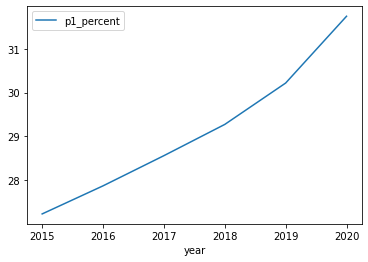

In [26]:
house_year.plot.line(x='year', y='p1_percent')

### 여러 개의 그룹

데이터프레임을 그룹으로 나눌 때 여러 개의 기준을 조합해서 나눌 수 있다.

다음과 같은 간단한 데이터프레임 `df` 을 고려해 보자. 열 `school` 은 학교, `sex`는 성, `score` 는  점수를 나타낸다고 하자.

In [27]:
df = pd.DataFrame( { 
    "school" : ["A", "A", "A", "A", "B", "B", "B"], 
    "sex" : ["M", "M", "F", "F", "M", "F", "F"],
    "score" : [100, 98, 34, 83, 56, 90, 65]
})
df

,school,sex,score
0,A,M,100
1,A,M,98
2,A,F,34
3,A,F,83
4,B,M,56
5,B,F,90
6,B,F,65


이제 데이터프레임 `df` 에서 학교별, 성별로 성적의 평균을 구해보자.

먼저 데이터프레임 `df` 을 학교별, 성별로 나누어 그룹회된 데이터프레임을 만들고 각 그룹에 대한 선적의 편균을 구해보자.

In [28]:
df.groupby( by =["school", "sex"]).mean()

score
school sex       
A      F     58.5
       M     99.0
B      F     77.5
       M     56.0

이렇게 데이터프레임은 `groupby()` 메소드를 이용하여 여러 개의 그룹으로 나누어 요약할 수 있다.

만약 그룹으로 나누는데 사용하는 열의 자료형식이 숫자면 어떤 일이 벌어질까. 자료의 범주가 숫자로 나타나는 경우가 많은데 이 경우 그룹화에 대하여 알아보자.

먼저 위에서 데이터프레임 `df` 과 동일한 자료를 가지지만 `df2` 는 여자는 1, 남자는 0 으로 자료가 저장되어 있다고 하자.

In [29]:
df2 = pd.DataFrame( { 
    "school" : ["A", "A", "A", "A", "B", "B", "B"], 
    "sex" : [0, 0, 1, 1, 0, 0, 1],
    "score" : [100, 98, 34, 83, 56, 90, 65]
})
df2

,school,sex,score
0,A,0,100
1,A,0,98
2,A,1,34
3,A,1,83
4,B,0,56
5,B,0,90
6,B,1,65


메소드 `groupby()` 는 숫자로 구성된 열도 나타난 숫자에 따라서 그룹화를 해준다.

In [30]:
df2.groupby( by =["school", "sex"]).mean()

score
school sex       
A      0     99.0
       1     58.5
B      0     73.0
       1     65.0

그룹화에 사용된 열들을 인덱스에서 다시 열로 바꾸고 싶으면 `reset_index()`를 적용하자.

In [31]:
df2.groupby( by =["school", "sex"]).mean().reset_index()

,school,sex,score
0,A,0,99.0
1,A,1,58.5
2,B,0,73.0
3,B,1,65.0


## 요약

- 여러 개의 열을 이용하여 새로운 열을 만드는 방법은 열을 선택하고 산술적인 연산을 적용해 준다. 
- 열에 대한 요약 통계는 다양한 메소드(예를 들어 `sum()`, `mean()` 등)을 적용하며 선택문 `axis=0` 을 이용한다.
- 자료의 그룹화는 `groupby()` 를 사용하며 이를 통해 그룹별로 요약할 수 있다.

[교과서 2.3절 고속열차 여객 수송자료](section:train:group) 에서 그룹별로 요약통계량을 구하는 더 자세한 예제가 있으니 참고하자.

## 유용한 팁

앞에서 열들을 더하는 작업을 할 때,  모든 열이름을 문자로 만들고, 리스트로 묶어서 슬라이싱하는 작업은 번거롭다.

데이터프레임의 열이름이 특정한 문자로 시작하는 것만 선택하는 방법이 있었으면 좋을것 같다. 프로그래밍은 성가신 수작업도 자주 해야하지만 더 빠르고 쉬운 방법을 찾는 노력도 필요하다.

다음 코드들의 결과를 보자. `.startswith()` 메소드는 말 그대로 문자열이 주어진 문자로 시작하는지 알아내는 기능을 한다. 

In [32]:
"p1".startswith('p')

True

In [33]:
"year".startswith('p')

False

일단 `house_year.columns` 는 데이터프레임의 모든 열이름으로 이루진 리스트라는 것을 배웠다.

아래 코드는 리스트의 문자열 중에서 `p` 로 시작하는 문자열으로 선택하려 다시 리스트를 만들어 주는 작업을 수행한다. 아직 배우지 않았지만 유용한 팁이니 알아 두자.     

In [34]:
[ x for x in house_year.columns if x.startswith('p') ]

['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7plus', 'p1_percent']